Model doğruluğu:  0.8324022346368715


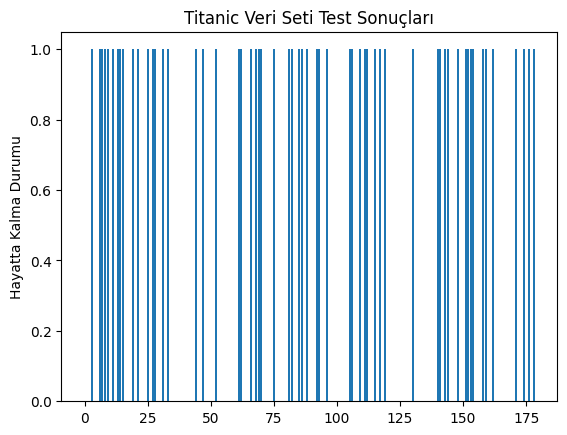

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setini yükleme
data = pd.read_csv('titanic.csv')

# Gereksiz sütunları kaldırma
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Eksik verileri doldurma
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Kategorik verileri sayısallaştırma
data['Sex'] = np.where(data['Sex'] == 'female', 1, 0)

# Bağımsız değişkenleri seçme
X = data.drop(['Survived'], axis=1)

# Bağımlı değişkeni seçme
y = data['Survived']

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest sınıflandırma modeli oluşturma ve eğitme
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rf.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Model doğruluğu: ", accuracy)

# Doğruluk oranının grafiğini çizdirme
y_pos = np.arange(len(y_pred))
plt.bar(y_pos, y_pred)
plt.ylabel('Hayatta Kalma Durumu')
plt.title('Titanic Veri Seti Test Sonuçları')
plt.show()

Lütfen yolcunun sınıfını (1, 2, 3) girin: 3
Lütfen yolcunun cinsiyetini (0: Erkek, 1: Kadın) girin: 0
Lütfen yolcunun yaşını girin: 28
Lütfen yolcunun kardeş/eş sayısını girin: 1
Lütfen yolcunun ebeveyn/çocuk sayısını girin: 1
Lütfen yolcunun bilet fiyatını girin: 1200
Yeni yolcunun hayatta kalma olasılığı:  0.34585714285714286


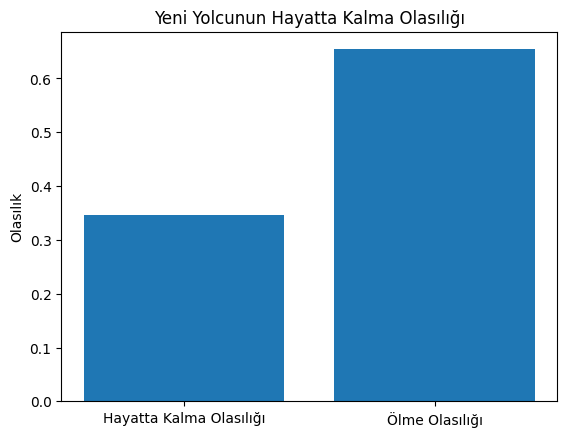

In [58]:
pclass = int(input("Lütfen yolcunun sınıfını (1, 2, 3) girin: "))
sex = int(input("Lütfen yolcunun cinsiyetini (0: Erkek, 1: Kadın) girin: "))
age = int(input("Lütfen yolcunun yaşını girin: "))
sibsp = int(input("Lütfen yolcunun kardeş/eş sayısını girin: "))
parch = int(input("Lütfen yolcunun ebeveyn/çocuk sayısını girin: "))
fare = float(input("Lütfen yolcunun bilet fiyatını girin: "))

new_passenger = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare]
})

# Yeni yolcunun hayatta kalma olasılığını tahmin etme
survival_prob = rf.predict_proba(new_passenger)[:,1][0]
print("Yeni yolcunun hayatta kalma olasılığı: ", survival_prob)

# Sonucu gösteren bir grafik çizdirme
labels = ['Hayatta Kalma Olasılığı', 'Ölme Olasılığı']
values = [survival_prob, 1-survival_prob]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('Olasılık')
ax.set_title('Yeni Yolcunun Hayatta Kalma Olasılığı')
plt.show()